## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.771836  1.013772 -0.962291 -0.808010  1.551120  0.826011
1  1.151894 -0.799617 -0.887840 -0.993377  0.111361 -0.167061
2 -0.219675  0.356112 -1.057940  1.803398  1.357880  2.117201
3  1.457444  0.966889  1.098200 -0.876288 -0.788795 -0.563333
4 -0.851701  0.411054  1.459463 -0.309354  1.142181  0.509215


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9911889	total: 57.7ms	remaining: 57.7s
1:	learn: 0.9788012	total: 58.4ms	remaining: 29.1s
2:	learn: 0.9712077	total: 59.1ms	remaining: 19.7s
3:	learn: 0.9610979	total: 59.8ms	remaining: 14.9s
4:	learn: 0.9519174	total: 60.3ms	remaining: 12s
5:	learn: 0.9438712	total: 60.6ms	remaining: 10s
6:	learn: 0.9348883	total: 61.3ms	remaining: 8.69s
7:	learn: 0.9242110	total: 61.8ms	remaining: 7.66s
8:	learn: 0.9144425	total: 62.3ms	remaining: 6.85s
9:	learn: 0.9067711	total: 62.8ms	remaining: 6.22s
10:	learn: 0.8978189	total: 63.3ms	remaining: 5.69s
11:	learn: 0.8878569	total: 63.7ms	remaining: 5.24s
12:	learn: 0.8787669	total: 64.2ms	remaining: 4.88s
13:	learn: 0.8705219	total: 64.7ms	remaining: 4.56s
14:	learn: 0.8630629	total: 65.2ms	remaining: 4.28s
15:	learn: 0.8553975	total: 65.7ms	remaining: 4.04s
16:	learn: 0.8471938	total: 66.1ms	remaining: 3.82s
17:	learn: 0.8419450	total: 66.5ms	remaining: 3.63s
18:	learn: 0.8333804	total: 66.9ms	remaining: 3.

98:	learn: 0.4222520	total: 107ms	remaining: 976ms
99:	learn: 0.4186352	total: 108ms	remaining: 970ms
100:	learn: 0.4161701	total: 108ms	remaining: 964ms
101:	learn: 0.4129840	total: 109ms	remaining: 958ms
102:	learn: 0.4103942	total: 109ms	remaining: 952ms
103:	learn: 0.4071098	total: 110ms	remaining: 947ms
104:	learn: 0.4035209	total: 110ms	remaining: 940ms
105:	learn: 0.3999005	total: 111ms	remaining: 933ms
106:	learn: 0.3963563	total: 111ms	remaining: 927ms
107:	learn: 0.3929675	total: 111ms	remaining: 921ms
108:	learn: 0.3895125	total: 112ms	remaining: 916ms
109:	learn: 0.3861606	total: 113ms	remaining: 911ms
110:	learn: 0.3828709	total: 113ms	remaining: 906ms
111:	learn: 0.3802085	total: 114ms	remaining: 902ms
112:	learn: 0.3774829	total: 114ms	remaining: 898ms
113:	learn: 0.3753462	total: 115ms	remaining: 893ms
114:	learn: 0.3718964	total: 115ms	remaining: 888ms
115:	learn: 0.3688568	total: 116ms	remaining: 882ms
116:	learn: 0.3658269	total: 116ms	remaining: 877ms
117:	learn: 0.

266:	learn: 0.1304043	total: 186ms	remaining: 512ms
267:	learn: 0.1293520	total: 187ms	remaining: 511ms
268:	learn: 0.1286233	total: 188ms	remaining: 510ms
269:	learn: 0.1277642	total: 188ms	remaining: 508ms
270:	learn: 0.1271102	total: 188ms	remaining: 507ms
271:	learn: 0.1264567	total: 189ms	remaining: 505ms
272:	learn: 0.1254944	total: 189ms	remaining: 504ms
273:	learn: 0.1248166	total: 190ms	remaining: 503ms
274:	learn: 0.1239911	total: 190ms	remaining: 502ms
275:	learn: 0.1231233	total: 191ms	remaining: 500ms
276:	learn: 0.1221065	total: 191ms	remaining: 499ms
277:	learn: 0.1213456	total: 192ms	remaining: 498ms
278:	learn: 0.1204562	total: 192ms	remaining: 497ms
279:	learn: 0.1197809	total: 193ms	remaining: 496ms
280:	learn: 0.1188900	total: 193ms	remaining: 495ms
281:	learn: 0.1181447	total: 201ms	remaining: 512ms
282:	learn: 0.1175508	total: 202ms	remaining: 511ms
283:	learn: 0.1167617	total: 202ms	remaining: 510ms
284:	learn: 0.1157901	total: 203ms	remaining: 508ms
285:	learn: 

446:	learn: 0.0467013	total: 277ms	remaining: 342ms
447:	learn: 0.0465018	total: 277ms	remaining: 342ms
448:	learn: 0.0461067	total: 278ms	remaining: 341ms
449:	learn: 0.0457188	total: 278ms	remaining: 340ms
450:	learn: 0.0455259	total: 279ms	remaining: 339ms
451:	learn: 0.0453130	total: 279ms	remaining: 339ms
452:	learn: 0.0452401	total: 281ms	remaining: 339ms
453:	learn: 0.0451679	total: 281ms	remaining: 338ms
454:	learn: 0.0450965	total: 282ms	remaining: 337ms
455:	learn: 0.0447195	total: 282ms	remaining: 337ms
456:	learn: 0.0445250	total: 283ms	remaining: 336ms
457:	learn: 0.0444551	total: 283ms	remaining: 335ms
458:	learn: 0.0440868	total: 284ms	remaining: 334ms
459:	learn: 0.0437252	total: 284ms	remaining: 333ms
460:	learn: 0.0435545	total: 284ms	remaining: 332ms
461:	learn: 0.0434872	total: 285ms	remaining: 332ms
462:	learn: 0.0431336	total: 285ms	remaining: 331ms
463:	learn: 0.0428993	total: 286ms	remaining: 330ms
464:	learn: 0.0427044	total: 286ms	remaining: 329ms
465:	learn: 

493:	learn: 0.0375251	total: 297ms	remaining: 305ms
494:	learn: 0.0374073	total: 298ms	remaining: 304ms
495:	learn: 0.0373571	total: 298ms	remaining: 303ms
496:	learn: 0.0370568	total: 299ms	remaining: 302ms
497:	learn: 0.0368612	total: 299ms	remaining: 301ms
498:	learn: 0.0368121	total: 299ms	remaining: 300ms
499:	learn: 0.0365630	total: 300ms	remaining: 300ms
500:	learn: 0.0363201	total: 300ms	remaining: 299ms
501:	learn: 0.0361873	total: 300ms	remaining: 298ms
502:	learn: 0.0360761	total: 301ms	remaining: 297ms
503:	learn: 0.0359466	total: 301ms	remaining: 296ms
504:	learn: 0.0358998	total: 301ms	remaining: 295ms
505:	learn: 0.0357729	total: 302ms	remaining: 295ms
506:	learn: 0.0356281	total: 302ms	remaining: 294ms
507:	learn: 0.0355152	total: 302ms	remaining: 293ms
508:	learn: 0.0353797	total: 303ms	remaining: 292ms
509:	learn: 0.0353278	total: 303ms	remaining: 291ms
510:	learn: 0.0352828	total: 304ms	remaining: 290ms
511:	learn: 0.0350173	total: 304ms	remaining: 290ms
512:	learn: 

698:	learn: 0.0140778	total: 406ms	remaining: 175ms
699:	learn: 0.0140233	total: 407ms	remaining: 174ms
700:	learn: 0.0139898	total: 407ms	remaining: 174ms
701:	learn: 0.0138897	total: 408ms	remaining: 173ms
702:	learn: 0.0138500	total: 408ms	remaining: 172ms
703:	learn: 0.0138100	total: 410ms	remaining: 172ms
704:	learn: 0.0137391	total: 410ms	remaining: 172ms
705:	learn: 0.0136610	total: 411ms	remaining: 171ms
706:	learn: 0.0135793	total: 411ms	remaining: 170ms
707:	learn: 0.0134807	total: 411ms	remaining: 170ms
708:	learn: 0.0133998	total: 412ms	remaining: 169ms
709:	learn: 0.0133318	total: 412ms	remaining: 168ms
710:	learn: 0.0132378	total: 412ms	remaining: 168ms
711:	learn: 0.0131872	total: 413ms	remaining: 167ms
712:	learn: 0.0131500	total: 413ms	remaining: 166ms
713:	learn: 0.0130712	total: 414ms	remaining: 166ms
714:	learn: 0.0129947	total: 414ms	remaining: 165ms
715:	learn: 0.0129456	total: 414ms	remaining: 164ms
716:	learn: 0.0128696	total: 415ms	remaining: 164ms
717:	learn: 

865:	learn: 0.0073392	total: 481ms	remaining: 74.5ms
866:	learn: 0.0073322	total: 482ms	remaining: 73.9ms
867:	learn: 0.0073213	total: 482ms	remaining: 73.4ms
868:	learn: 0.0073144	total: 483ms	remaining: 72.8ms
869:	learn: 0.0073025	total: 483ms	remaining: 72.2ms
870:	learn: 0.0072908	total: 484ms	remaining: 71.6ms
871:	learn: 0.0072525	total: 484ms	remaining: 71.1ms
872:	learn: 0.0072264	total: 485ms	remaining: 70.5ms
873:	learn: 0.0071851	total: 485ms	remaining: 69.9ms
874:	learn: 0.0071350	total: 486ms	remaining: 69.4ms
875:	learn: 0.0070980	total: 486ms	remaining: 68.8ms
876:	learn: 0.0070784	total: 487ms	remaining: 68.3ms
877:	learn: 0.0070531	total: 487ms	remaining: 67.7ms
878:	learn: 0.0070172	total: 488ms	remaining: 67.2ms
879:	learn: 0.0069927	total: 488ms	remaining: 66.6ms
880:	learn: 0.0069505	total: 494ms	remaining: 66.8ms
881:	learn: 0.0069156	total: 495ms	remaining: 66.2ms
882:	learn: 0.0068970	total: 495ms	remaining: 65.6ms
883:	learn: 0.0068851	total: 496ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

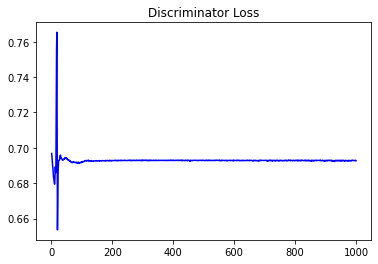

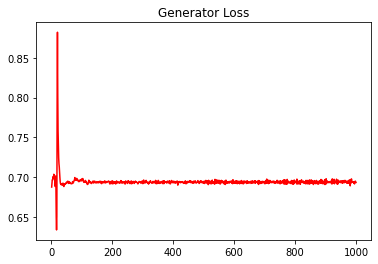

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2237681934813496


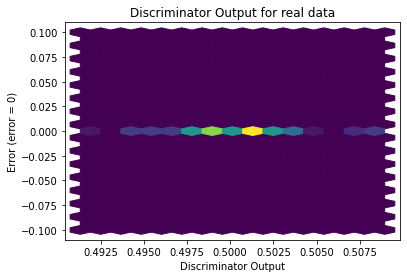

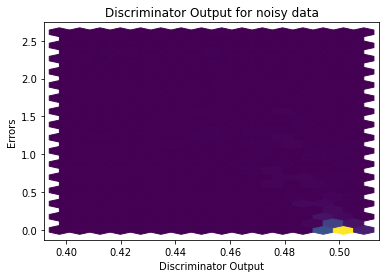

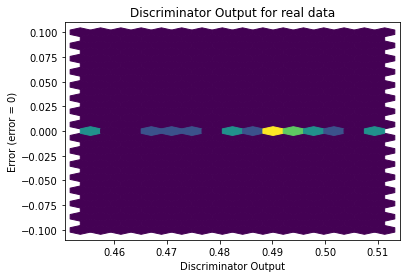

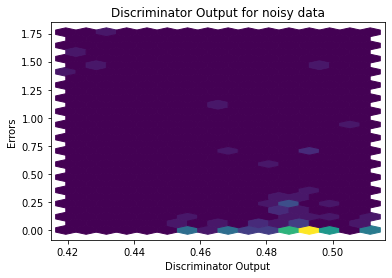

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


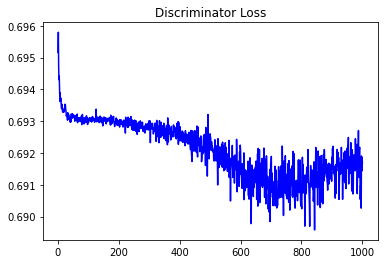

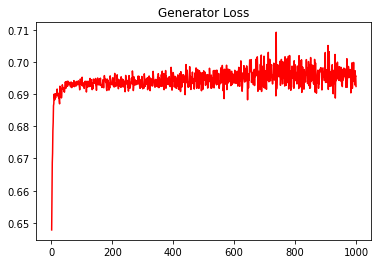

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.22884356440181056


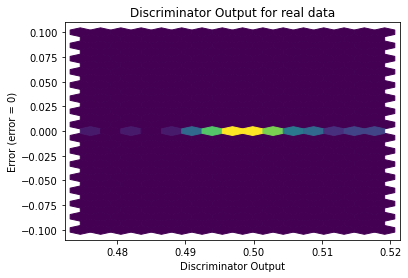

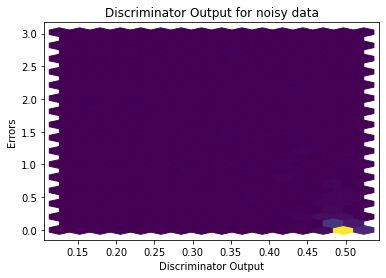

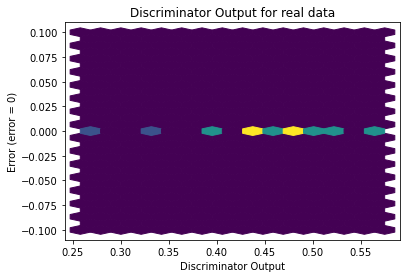

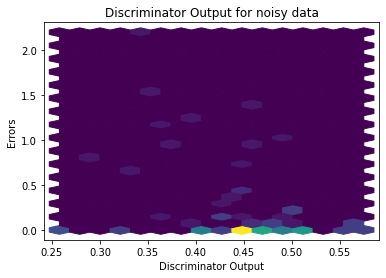

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1746]], requires_grad=True)
